[ 모듈 로딩 및 데이터 준비 ]

In [2]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import koreanize_matplotlib

In [3]:
# 데이터 준비
colombia_production = './yield_colombia.xlsx'
colombia_weather = './페레이아 기상.xlsx'

production = pd.read_excel(colombia_production)
weather = pd.read_excel(colombia_weather)

# 정보 확인
production.info()
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             14 non-null     object 
 1   Element          14 non-null     object 
 2   Item Code (CPC)  14 non-null     int64  
 3   Year Code        14 non-null     int64  
 4   Year             14 non-null     int64  
 5   Unit             14 non-null     object 
 6   Value            14 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 916.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             181 non-null    int64         
 1   지점명            181 non-null    object        
 2   시간(UTC)        181 non-null    datetime64[ns]
 3   월평균 기온         160 non-null    float64       
 4   일

[ 결측치 확인 및 처리]

In [4]:
# 날씨의 평균온도 데이터 '-99.0' --> 결측치로 변환 --> 앞의 값 동일 처리하기
weather = weather.replace(-99.90, np.nan)

# 결측치 확인
weather.isna().sum()
production.isna().sum()

Area               0
Element            0
Item Code (CPC)    0
Year Code          0
Year               0
Unit               0
Value              0
dtype: int64

In [5]:
# 연도, 월 컬럼 생성
weather['월'] = weather['시간(UTC)'].dt.month
weather['연도'] = weather['시간(UTC)'].dt.year
temperature_mean = weather.groupby('월')['월평균 기온'].mean()
temperature_mean = list(map(float, temperature_mean)) 
temperature_mean
for idx in range(len(weather)):
    if pd.isnull(weather.loc[idx, '월평균 기온']):
        for month in range(1,13):
            if weather.loc[idx, '월'] == month:
                weather.loc[idx,'월평균 기온'] = temperature_mean[month-1]

# 월 평균 기온 소수점 두번째 자리까지 반올림
weather['월평균 기온'] = weather['월평균 기온'].round(2)

# 데이터 확인
weather.head(50)    

,지점,지점명,시간(UTC),월평균 기온,일평균 기온의 월표준편차,월평균 일최고기온,월평균 일최저기온,최대 일강수량,월중 최대풍속,월중 최대풍속 날,월일조시간,월,연도
0,80210,페레이라/마테카나,2010-01-31,23.50,0.7,29.1,18.3,11.3,8.6,NaN,241.0,1,2010
1,80210,페레이라/마테카나,2010-02-28,23.90,0.7,28.9,18.9,25.2,8.3,23.0,159.0,2,2010
2,80210,페레이라/마테카나,2010-03-31,23.50,0.6,28.4,18.8,37.9,12.2,10.0,174.0,3,2010
3,80210,페레이라/마테카나,2010-04-30,22.00,1.2,25.8,18.3,83.4,13.6,3.0,122.0,4,2010
4,80210,페레이라/마테카나,2010-05-31,22.30,1.3,27.0,18.5,65.8,7.8,14.0,149.0,5,2010
5,80210,페레이라/마테카나,2010-06-30,21.40,0.7,25.7,17.8,45.9,7.2,12.0,136.0,6,2010
6,80210,페레이라/마테카나,2010-07-31,21.10,0.7,25.4,16.7,25.9,6.7,30.0,134.0,7,2010
7,80210,페레이라/마테카나,2010-08-31,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2010
8,80210,페레이라/마테카나,2010-09-30,21.00,0.5,25.6,17.5,44.5,10.3,1.0,117.0,9,2010
9,80210,페레이라/마테카나,2010-10-31,21.10,0.8,25.7,17.4,43.5,10.6,5.0,135.0,10,2010


[ 데이터 처리 ]

1. 필요한 데이터만 추출 <hr>

In [6]:
# 콜롬비아 원두 생산량의 'Year'와 'Value'추출
production_Year = production['Year']
production_Value = production['Value']
production_Year
production_Value

0      688.1
1      647.2
2      663.8
3      846.4
4      915.6
5     1033.2
6     1051.2
7      942.1
8      927.4
9     1036.8
10     986.6
11     667.0
12     789.4
13     809.2
Name: Value, dtype: float64

In [7]:
# 페레이아 기상 데이터의 '시간'과 '월평균 기온' 추출
weather_temperature = weather['월평균 기온']
avg_temperature = weather[['시간(UTC)', '월평균 기온']].copy()
avg_temperature['연도'] = avg_temperature['시간(UTC)'].dt.year

# 페레이아 기상 데이터의 월 평균 온도를 연도별로 구하기
mean_temperature = avg_temperature.groupby('연도')['월평균 기온'].mean()

# 2010년에서 2023년까지 추출
mean_temperature = mean_temperature.loc[2010:2023]

# 데이터 확인
mean_temperature

연도
2010    21.987500
2011    21.800833
2012    21.980000
2013    22.000000
2014    22.133333
2015    22.933333
2016    22.705833
2017    22.283333
2018    22.066667
2019    22.466667
2020    22.491667
2021    21.875000
2022    21.429167
2023    22.661667
Name: 월평균 기온, dtype: float64

[ 시각화 ]

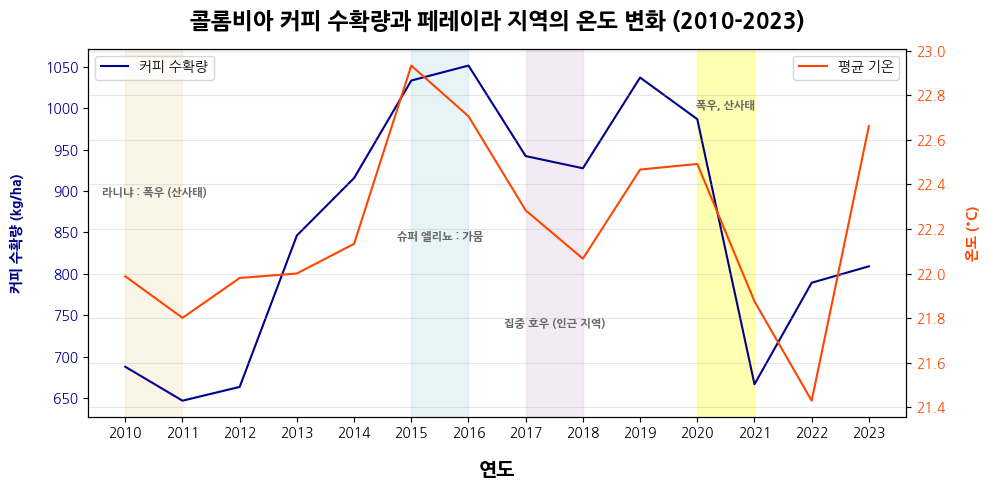

In [36]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize = (10, 5))

# x축과 왼쪽 y축 생성
ax1 = plt.gca() 
ax1.plot(production_Year, production_Value, label = '커피 수확량', color = 'darkblue')
ax1.set_xlabel('연도', fontsize = 14, labelpad = 15, fontweight = 'bold')
ax1.set_ylabel('커피 수확량 (kg/ha)', color = 'darkblue', labelpad = 15, fontweight = 'bold')
ax1.tick_params(axis = 'y', labelcolor = 'darkblue')

# 오른쪽 y축 생성
ax2 = ax1.twinx() 
ax2.plot(mean_temperature.index, mean_temperature.values, 'orangered', label = '평균 기온')
ax2.set_ylabel('온도 (°C)', color = 'orangered', labelpad = 15, fontweight = 'bold')
ax2.tick_params(axis = 'y', labelcolor = 'orangered')

ax1.axvspan(2010, 2011, color = 'wheat', alpha = 0.3)
ax1.axvspan(2015, 2016, color = 'lightblue', alpha = 0.3)
ax1.axvspan(2017, 2018, color = 'thistle', alpha = 0.3)
ax1.axvspan(2020, 2021, color = 'yellow', alpha = 0.3)

# 범례 설정
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')


ax1.text(2010.5, max(production_Value)*0.85, '라니냐 : 폭우 (산사태)', fontsize = 8, color = 'dimgray', ha = 'center', fontweight = 'bold')
ax1.text(2015.5, max(production_Value)*0.8, '슈퍼 엘리뇨 : 가뭄', fontsize = 8, color = 'dimgray', ha = 'center', fontweight = 'bold')
ax1.text(2017.5, max(production_Value)*0.7, '집중 호우 (인근 지역)', fontsize = 8, color = 'dimgray', ha = 'center', fontweight = 'bold')
ax1.text(2020.5, max(production_Value)*0.95, '폭우, 산사태', fontsize = 8, color = 'dimgray', ha = 'center', fontweight = 'bold')

# 제목, 눈금선 그리기
plt.title('콜롬비아 커피 수확량과 페레이라 지역의 온도 변화 (2010-2023)', fontsize = 16, pad = 15, fontweight = "bold")
ax1.set_xticks(production_Year)
plt.grid(True, alpha = 0.3)
plt.tight_layout()

[ 페레이아 원두 생산량과 월 평균 기온 관계 (산점도와 회귀선) ]

In [9]:
# 페레이아 지역의 원두 생산량의 '연도'와 '생산량'만 추출
production_two = production[['Year', 'Value']]
production_two

,Year,Value
0,2010,688.1
1,2011,647.2
2,2012,663.8
3,2013,846.4
4,2014,915.6
5,2015,1033.2
6,2016,1051.2
7,2017,942.1
8,2018,927.4
9,2019,1036.8


In [10]:
# 페레이아 지역의 원두 생산량의 '연도'와 '생산량'의 이름 바꾸기
production_one = production_two.rename(columns={'Year':'연도',
                       'Value':'값'})

In [11]:
# '연도'열을 인덱스로 설정
production_one.set_index('연도')

,값
연도,
2010,688.1
2011,647.2
2012,663.8
2013,846.4
2014,915.6
2015,1033.2
2016,1051.2
2017,942.1
2018,927.4


In [12]:
# '연도'를 기준으로 병합
df_combined = pd.merge(production_one, mean_temperature , on='연도', how= 'left')

# '연도'를 인덱스로 설정
df_combined = df_combined.set_index('연도')

# 확인
df_combined

# 상관계수 구하기
df_combined.corr()

,값,월평균 기온
값,1.000000,0.711712
월평균 기온,0.711712,1.000000


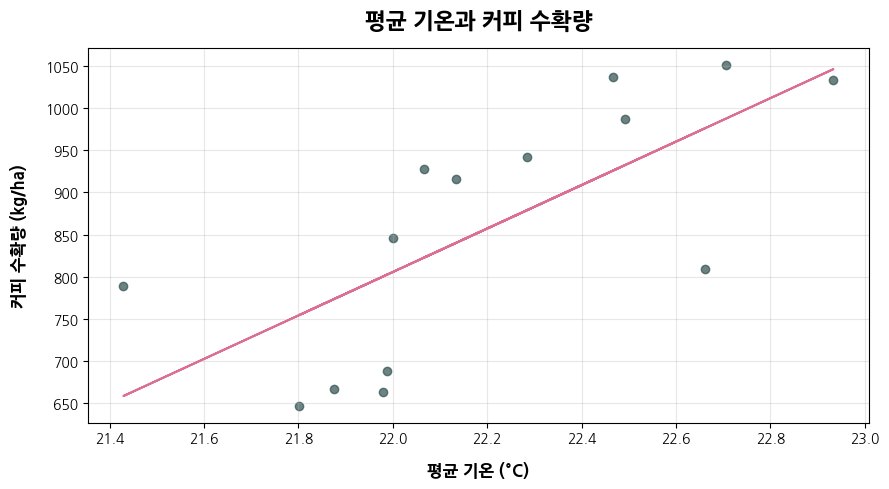

In [23]:
# 산점도 그리기
plt.figure(figsize = (9, 5))
plt.scatter(df_combined["월평균 기온"], df_combined["값"], color = "darkslategrey", alpha = 0.7)

# 그래프 꾸미기
plt.title("평균 기온과 커피 수확량", fontsize = 16, fontweight = "bold", pad = 15)
plt.xlabel("평균 기온 (°C)", fontsize = 12, labelpad = 12, fontweight = 'bold')
plt.ylabel("커피 수확량 (kg/ha)", fontsize = 12, labelpad = 12, fontweight = 'bold')
plt.grid(alpha = 0.3)

# 회귀선 계산
x = df_combined["월평균 기온"]
y = df_combined["값"]
coefficients = np.polyfit(x, y, 1)  # 1차 다항식(직선) 회귀
regression_line = np.poly1d(coefficients)

# 회귀선 그리기
plt.plot(x, regression_line(x), color = "palevioletred", label = "회귀선")

# 그래프 표시
plt.tight_layout()
plt.show()